<a href="https://colab.research.google.com/github/bhuwich/Image-Classification/blob/main/ImageClassificationLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
print(tf.__version__)

2.9.2


In [ ]:
# load data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print(f"shape train_images = {train_images.shape}")
print(f"shape train_images = {train_labels.shape}")
print(f"shape test_images = {test_images.shape}")
print(f"shape test_images = {test_labels.shape}")

shape train_images = (60000, 28, 28)
shape train_images = (60000,)
shape test_images = (10000, 28, 28)
shape test_images = (10000,)


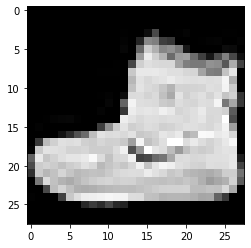

In [ ]:
plt.imshow(train_images[0, :, :],cmap='gray')

In [ ]:
[np.min(train_images[0, :, :]), np.max(train_images[0, :, :])]

[0, 255]

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# แบ่ง validation data แบบสุ่ม
val_ratio = 0.3
n_all = len(train_labels)
n_val = int(val_ratio*n_all)
n_train = n_all - n_val
print(f"n_train = {n_train}, n_val = {n_val}")

n_train = 42000, n_val = 18000


In [ ]:
# shuffle data
shuf_ind = np.random.permutation(len(train_labels))
train_images = train_images[shuf_ind, :, :]
train_labels = train_labels[shuf_ind]

In [ ]:
val_images = train_images[:n_val, :, :]
val_labels = train_labels[:n_val]
trainw_images= train_images[n_val:, :, :]
trainw_labels = train_labels[n_val:]
print(trainw_images.shape, trainw_labels.shape)
print(val_images.shape, val_labels.shape)

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


In [ ]:
# preprocess
trainw_images = trainw_images/255.0
val_images = val_images/255.0
test_images = test_images/255.0
# ทำให้ค่าอยู่ระหว่าง ช่วง 0-1เพื่อให้ weight gradient descent ปรับได้ง่าย

In [ ]:
[np.min(trainw_images), np.max(trainw_images)]

[0.0, 1.0]

In [ ]:
# สร้าง model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', patience=10,verbose=1)
mc = ModelCheckpoint("best_model.h5",monitor='val_loss',mode ='min', save_best_only=True, verbose=1)

In [ ]:
# train model
model.fit(trainw_images, trainw_labels, epochs=1000, validation_data=(val_images, val_labels), callbacks= [es, mc])

Epoch 1/1000


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1307/1313 [============================>.] - ETA: 0s - loss: 0.5067 - accuracy: 0.8175
Epoch 1: val_loss improved from inf to 0.40218, saving model to best_model.h5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5062 - accuracy: 0.8177 - val_loss: 0.4022 - val_accuracy: 0.8558
Epoch 2/1000
1302/1313 [============================>.] - ETA: 0s - loss: 0.3865 - accuracy: 0.8607
Epoch 2: val_loss improved from 0.40218 to 0.37113, saving model to best_model.h5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3866 - accuracy: 0.8606 - val_loss: 0.3711 - val_accuracy: 0.8673
Epoch 3/1000
1296/1313 [============================>.] - ETA: 0s - loss: 0.3490 - accuracy: 0.8730
Epoch 3: val_loss improved from 0.37113 to 0.34498, saving model to best_model.h5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3496 - accuracy: 0.8727 - val_loss: 0.3450 - val_accuracy: 0.8753
Epoch 4/1000
1304/1313 [============================>.] - ETA: 0s - loss

In [ ]:
# evaluation
# - confusion matrix ทั้ง 10 ตลาด
# - accuracy รวม
# - recall, precision, f1-score ของทั้ง 10 class
# tp = จำนวนครั้งที่ model บอกว่ามีและมีจริงๆ
# tn = จำนวนครั้งที่ model บอกว่าไม่มีและไม่มีจริงๆ
# fp = (False Alarms) จำนวนครั้งที่ model บอกว่ามี แต่ไม่มีจริงๆ
# fn = (Miss) จำนวนครั้งที่ model บอกว่าไม่มีแต่ มีจริงๆ

# recall = tp/(tp+fn) % เปอร์เซ็นต์การเรียกได้
# precision = tp/(tp+fn) % เปอร์เซ็นต์ความแม่นยำ
# f1-score = ค่าเฉลี่ยฮาร์โมนิกของ recall/precision = 2/( (1/recall)+ (1/precision))

In [ ]:
output = tf.keras.models.load_model("best_model.h5")

In [ ]:
output = model.predict(test_images)
detect = []
for i in range(len(output)):
  detect.append(np.argmax(output[i,:]))
detect = np.array(detect)
detect

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
cfm = tf.math.confusion_matrix(test_labels, detect)
cfm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[829,   0,  25,  17,   5,   3, 112,   0,   9,   0],
       [  6, 966,   2,  18,   3,   0,   4,   0,   1,   0],
       [ 10,   0, 846,  10,  58,   1,  73,   0,   2,   0],
       [ 25,   0,  15, 897,  30,   1,  26,   0,   5,   1],
       [  0,   1, 136,  27, 773,   0,  58,   0,   4,   1],
       [  0,   0,   0,   1,   0, 965,   0,  17,   1,  16],
       [134,   0,  99,  27,  59,   0, 668,   0,  13,   0],
       [  0,   0,   0,   0,   0,  30,   0, 936,   0,  34],
       [  1,   0,   8,   6,   0,   4,   5,   3, 972,   1],
       [  0,   0,   0,   0,   0,   9,   1,  30,   0, 960]], dtype=int32)>

In [ ]:
print("-"*114)
print(f"|{'class':^20}|{'TP':^10}|{'FP':^10}|{'FN':^10}|{'recall':^15}|{'precision (%)':^15}|{'F1 (%)':^15}|")
print("-"*114)
n_correct = 0
for i in range(cfm.shape[0]):
  tp = cfm[i,i]
  fp = np.sum(cfm[:,i]) - tp
  fn = np.sum(cfm[i,:]) - tp
  tn = np.sum(cfm) - tp - fp - fn
  n_correct += tp
  recall = tp/(tp+fn)
  precision = tp/(tp+fp)
  f1 = 2/((1/recall)+ (1/precision))
  print(f"|{class_names[i]:^20}|{tp:^10}|{fp:^10}|{fn:^10}|{recall:^15.2f}|{precision*100:^15.2f}|{f1*100:^15.2f}|")
print("-"*114)
print(f"overall accuracy = {n_correct*100/np.sum(cfm):.2f} %")
  

------------------------------------------------------------------------------------------------------------------
|       class        |    TP    |    FP    |    FN    |    recall     | precision (%) |    F1 (%)     |
------------------------------------------------------------------------------------------------------------------
|    T-shirt/top     |   829    |   176    |   171    |     0.83      |     82.49     |     82.69     |
|      Trouser       |   966    |    1     |    34    |     0.97      |     99.90     |     98.22     |
|      Pullover      |   846    |   285    |   154    |     0.85      |     74.80     |     79.40     |
|       Dress        |   897    |   106    |   103    |     0.90      |     89.43     |     89.57     |
|        Coat        |   773    |   155    |   227    |     0.77      |     83.30     |     80.19     |
|       Sandal       |   965    |    48    |    35    |     0.96      |     95.26     |     95.88     |
|       Shirt        |   668    |   279   

In [ ]:
#--------------------------------------------------------------------------------#

In [ ]:
output = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
output.shape

(10000, 10)

In [ ]:
class_names[np.argmax(output[1400,:])]

'Coat'

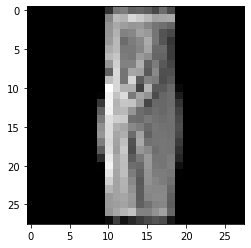

In [ ]:
plt.imshow(train_images[1400, :, :],cmap='gray')